

---


# Week 5:  Bioinformatics Application Challenge


---



## Introduction: The Biological Problem
Mycobacterium tuberculosis (MTB), the bacterium that causes tuberculosis, can remain dormant in the human body for years in a state of latency. This latency is often linked to hypoxia, or a lack of oxygen, within the host's tissues.

**Our hypothesis** is that a specific set of genes is "switched on" or upregulated in response to hypoxia. This coordinated switching is likely controlled by a single transcription factor (a type of protein) that binds to a specific DNA sequence, or motif, in the promoter region (the area "upstream" of a gene) for all of these genes.

**Our Goal:** To identify this common transcription factor binding site motif using computational tools.

**Our Data:** A FASTA file containing the 250 base pair (bp) upstream regions for all MTB genes known to be upregulated during hypoxia. Our biologist colleague suspects the motif is about 20 bp long.

In [1]:
#@title 1. Install MEME Suite and Dependencies (Conda-Native Method)
# This is the corrected installation cell. It installs Ghostscript INSIDE
# the conda environment, which is a more reliable method.

print("STEP 1: Installing Conda...")
!pip install -q condacolab
import condacolab
condacolab.install()

print("\nSTEP 2: Installing MEME and Ghostscript together using Conda...")
# This command tells conda to get meme from the 'bioconda' channel
# and ghostscript from the 'conda-forge' channel.
!conda install -c bioconda -c conda-forge meme ghostscript -y

print("\n--- Installation Complete! ---")
print("The environment is now correctly set up. You can run the next cells.")

STEP 1: Installing Conda...
⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:11
🔁 Restarting kernel...

STEP 2: Installing MEME and Ghostscript together using Conda...
Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ghostscript
    - meme


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.8.3   |       hbd8a1cb_0         151 KB  conda-forge
    certifi-2025.8.3           |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-25.7.0               |  py311h38be061_0         1.2 MB  conda-forge
    conda-libmamba-solver-25.4.0|     pyhd8ed1ab_0          41 K

In [1]:
#@title 2. Download the FASTA Data Files
import os

base_url = "https://bioinformaticsalgorithms.com/software_challenges/motifs/"
files_to_download = [
    "upstream25.txt",
    "upstream100.txt",
    "upstream250.txt",
    "upstream500.txt",
    "upstream1000.txt"
]

print("Downloading required FASTA files...")
for filename in files_to_download:
    if not os.path.exists(filename):
        !wget {base_url}{filename}
    else:
        print(f"{filename} already exists. Skipping download.")

print("\nAll data files are ready.")

--2025-09-02 18:03:40--  https://bioinformaticsalgorithms.com/software_challenges/motifs/upstream25.txt
Resolving bioinformaticsalgorithms.com (bioinformaticsalgorithms.com)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to bioinformaticsalgorithms.com (bioinformaticsalgorithms.com)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1244 (1.2K) [text/plain]
Saving to: ‘upstream25.txt’

upstream25.txt      100%[===================>]   1.21K  --.-KB/s    in 0s      

2025-09-02 18:03:40 (67.4 MB/s) - ‘upstream25.txt’ saved [1244/1244]

--2025-09-02 18:03:40--  https://bioinformaticsalgorithms.com/software_challenges/motifs/upstream100.txt
Resolving bioinformaticsalgorithms.com (bioinformaticsalgorithms.com)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to bioinformaticsalgorithms.com (bioinformaticsalgorithms.com)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39


Running MEME on upstream250.txt (width=20)...
Writing results to output directory 'meme_fixed_width_20'.
BACKGROUND: using background model of order 0
PRIMARY (classic): n 36 p0 36 p1 0 p2 0
SEQUENCE GROUP USAGE-- Starts/EM: p0; Trim: p0; pvalue: p0; nsites: p0,p1,p2
w set, setting max and min widths to 20
SEEDS: maxwords 9000 highwater mark: seq 36 pos 230
Initializing the motif probability tables for 2 to 36 sites...
nsites = 36
Done initializing.

seqs=    36, min_w= 250, max_w=  250, total_size=     9000

motif=1
SEED DEPTHS: 2 4 8 16 32 36
SEED WIDTHS: 20
em: w=  20, psites=  36, iter=  40 

--- MEME Run Complete ---
Results are in the 'meme_fixed_width_20' directory.

Discovered Motif Logo:


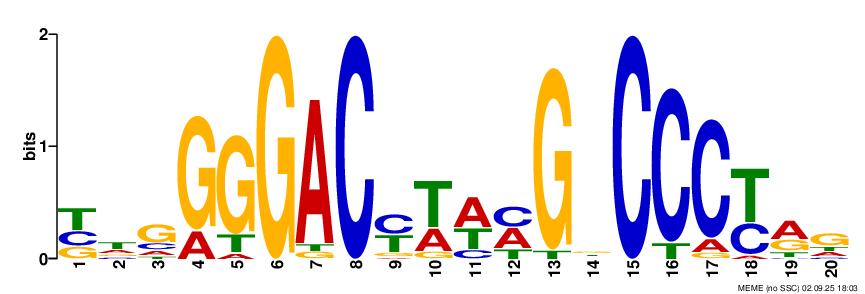

In [2]:
#@title 3. Run MEME with Fixed Width (20 bp)
import os
import shutil
from IPython.display import Image, display

output_dir = "meme_fixed_width_20"

# Remove the output directory if it exists to ensure a fresh run
if os.path.exists(output_dir):
    print(f"Removing existing directory: {output_dir}")
    shutil.rmtree(output_dir)

print(f"\nRunning MEME on upstream250.txt (width=20)...")
!meme upstream250.txt -o {output_dir} -nmotifs 1 -w 20 -dna

print("\n--- MEME Run Complete ---")
print(f"Results are in the '{output_dir}' directory.")

# Display the resulting motif logo
print("\nDiscovered Motif Logo:")
logo_path = f'{output_dir}/logo1.png'
if os.path.exists(logo_path):
    display(Image(logo_path))
else:
    print(f"ERROR: {logo_path} was not generated. Check MEME output above for errors.")

### **Part 2: Variable Width Motif Discovery**
**(a) How long is the motif produced by MEME?**

**Answer:** By inspecting the output file `meme_variable_width/meme.txt`, MEME determines the optimal width is **20 bp**, confirming our colleague's hypothesis.

**(b) Is the motif logo produced by MEME similar to the one produced before?**

**Answer:** **Yes, it is extremely similar.** The core conserved pattern is identical. The algorithm confirmed that 20 is the statistically optimal length for the pattern in this data.


Running MEME on upstream250.txt (minw=6, maxw=50)...
Writing results to output directory 'meme_variable_width'.
BACKGROUND: using background model of order 0
PRIMARY (classic): n 36 p0 36 p1 0 p2 0
SEQUENCE GROUP USAGE-- Starts/EM: p0; Trim: p0; pvalue: p0; nsites: p0,p1,p2
SEEDS: maxwords 9000 highwater mark: seq 36 pos 244
Initializing the motif probability tables for 2 to 36 sites...
nsites = 36
Done initializing.

seqs=    36, min_w= 250, max_w=  250, total_size=     9000

motif=1
SEED DEPTHS: 2 4 8 16 32 36
SEED WIDTHS: 6 8 11 15 21 29 41 50
em: w=  50, psites=  36, iter=  40 

--- MEME Run Complete ---
Results are in the 'meme_variable_width' directory.

Discovered Motif Logo:


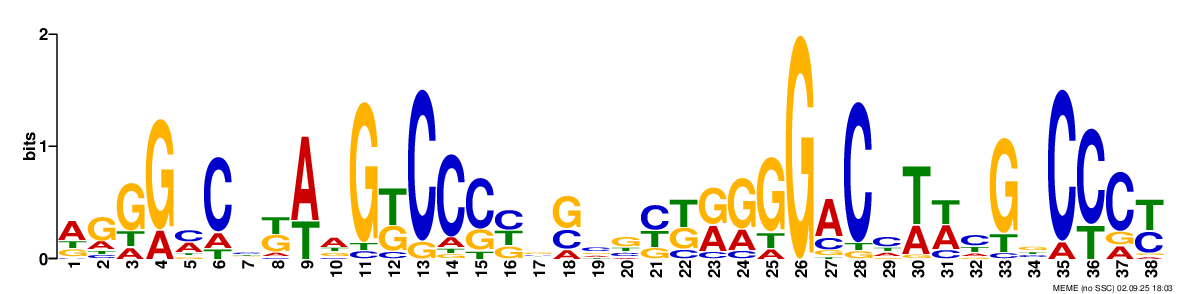

In [3]:
#@title 4. Run MEME with Variable Width (6-50 bp)
import os
import shutil
from IPython.display import Image, display

output_dir = "meme_variable_width"

# Remove the output directory if it exists to ensure a fresh run
if os.path.exists(output_dir):
    print(f"Removing existing directory: {output_dir}")
    shutil.rmtree(output_dir)

print(f"\nRunning MEME on upstream250.txt (minw=6, maxw=50)...")
!meme upstream250.txt -o {output_dir} -nmotifs 1 -minw 6 -maxw 50 -dna

print("\n--- MEME Run Complete ---")
print(f"Results are in the '{output_dir}' directory.")

# Display the resulting motif logo
print("\nDiscovered Motif Logo:")
logo_path = f'{output_dir}/logo1.png'
if os.path.exists(logo_path):
    display(Image(logo_path))
else:
    print(f"ERROR: {logo_path} was not generated. Check MEME output above for errors.")

### **Part 3: Conceptual Questions**

#### **When using motif software with fixed motif lengths, is it better to start with short motifs or long motifs? Why?**

**Answer:** It is better to start with **shorter motifs**.

**Justification:** The primary reasons are computational efficiency and the "seed and extend" strategy. It is faster to find highly conserved short patterns. These short "seeds" can then be examined and potentially extended into longer motifs if the flanking regions also show some conservation.

#### **How would you generate strings to evaluate the statistical significance of a motif? Justify your answer.**

**Answer:** The best method is to generate background strings by **shuffling the original input sequences**.

**Justification:** This method creates a perfect control dataset because it destroys the ordered patterns (the motifs) while perfectly preserving the underlying "noise" characteristics of the data, such as G+C content and sequence length distribution. If a motif is found in the real data but not in the shuffled data, it is statistically significant.

---

### **Part 4: Impact of Upstream Region Length (Signal-to-Noise Ratio)**

Here, we use the real data files to investigate how the length of the surrounding "noise" DNA affects our ability to find the 20 bp "signal" motif.

In [4]:
#@title 5. Run MEME on All Varying Upstream Lengths (width=20)
import os
import shutil

# List of files and their corresponding output directories
datasets = {
    "upstream25.txt": "meme_25",
    "upstream100.txt": "meme_100",
    "upstream500.txt": "meme_500",
    "upstream1000.txt": "meme_1000"
}

for filename, output_dir in datasets.items():
    # Remove the output directory if it exists to ensure a fresh run
    if os.path.exists(output_dir):
        print(f"Removing existing directory: {output_dir}")
        shutil.rmtree(output_dir)

    print(f"\nRunning MEME on {filename}...")
    !meme {filename} -o {output_dir} -nmotifs 1 -w 20 -dna
    print(f"--- Finished processing {filename} ---")

print("\n--- All Runs Complete ---")


Running MEME on upstream25.txt...
Writing results to output directory 'meme_25'.
BACKGROUND: using background model of order 0
PRIMARY (classic): n 36 p0 36 p1 0 p2 0
SEQUENCE GROUP USAGE-- Starts/EM: p0; Trim: p0; pvalue: p0; nsites: p0,p1,p2
w set, setting max and min widths to 20
SEEDS: maxwords 900 highwater mark: seq 36 pos 5
Initializing the motif probability tables for 2 to 36 sites...
nsites = 36
Done initializing.

seqs=    36, min_w=  25, max_w=   25, total_size=      900

motif=1
SEED DEPTHS: 2 4 8 16 32 36
SEED WIDTHS: 20
em: w=  20, psites=  36, iter=  40 
--- Finished processing upstream25.txt ---

Running MEME on upstream100.txt...
Writing results to output directory 'meme_100'.
BACKGROUND: using background model of order 0
PRIMARY (classic): n 36 p0 36 p1 0 p2 0
SEQUENCE GROUP USAGE-- Starts/EM: p0; Trim: p0; pvalue: p0; nsites: p0,p1,p2
w set, setting max and min widths to 20
SEEDS: maxwords 3600 highwater mark: seq 36 pos 80
Initializing the motif probability tables 

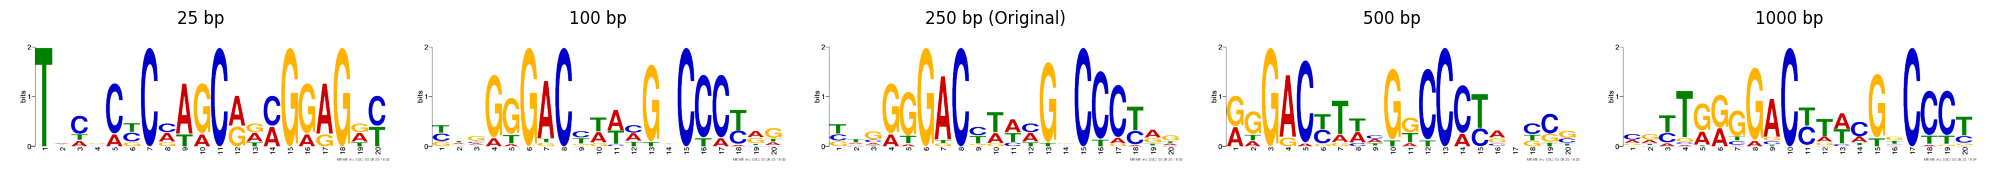

In [5]:
#@title 6. Compare All Motif Logos
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, HTML

# List of logo files and their corresponding titles
logos = {
    '25 bp': 'meme_25/logo1.png',
    '100 bp': 'meme_100/logo1.png',
    '250 bp (Original)': 'meme_fixed_width_20/logo1.png',
    '500 bp': 'meme_500/logo1.png',
    '1000 bp': 'meme_1000/logo1.png'
}

display(HTML("<h3>Comparison of Motif Logos from Different Upstream Lengths</h3>"))

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for ax, (title, path) in zip(axes, logos.items()):
    try:
        img = mpimg.imread(path)
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    except FileNotFoundError:
        ax.set_title(f"{title}\n(Logo not found)")
        ax.axis('off')

plt.tight_layout()
plt.show()



#### **Which of the motif logos that you created are similar to the motif logo generated from `upstream250.txt`?**

**Answer:**
The motif logos generated from **`upstream100.txt`**, **`upstream500.txt`**, and **`upstream1000.txt`** are all highly similar to the motif from `upstream250.txt`.

The logo from **`upstream25.txt`** does not resemble the others and shows a much weaker, less conserved pattern.

**Justification (Signal-to-Noise Ratio):**
*   **`upstream100.txt`, `upstream250.txt`, `upstream500.txt`, `upstream1000.txt`**: This result demonstrates that the biological "signal" (the 20 bp motif) is exceptionally strong. Even when it is embedded in 1000 bp of "noise," it is still the most statistically significant pattern in the dataset and is easily found by MEME. This gives us high confidence that it is a real biological feature.
*   **`upstream25.txt`**: The signal is lost here. A 20 bp motif is a huge fraction of a 25 bp sequence. The likely reason for failure is that the true motif is not always located at the very beginning of the upstream region. By truncating the sequences to just 25 bp, we have likely cut off the motif from most of the sequences, destroying the data needed to find it.